In [1]:
import numpy as np
import matplotlib.pyplot as plt

I1 = np.array([0.08, 50.74, 80, 125.43, 157.32, 122.3, 103.58, 80.16, 71.8, 63.82, 64.2, 57.59, 47.75, 42.90, 39.73, 36.96, 34.30, 32.81, 32.58, 35.80, 41.11, 54.52, 58.70, 75.24, 75.74])
V1 = np.array([0.09, 1.268, 1.4, 1.628, 1.961, 2.476, 2.706, 3.088, 3.284, 3.521, 3.526, 3.762, 4.270, 4.617, 4.944, 5.312, 5.861, 6.466, 7.052, 8.315, 9.292, 10.046, 10.778, 11.510, 11.506])

I2 = np.array([0.09, 0.17, 11.43, 50.69, 89.22, 78.60, 48.1, 31.41, 25.38, 18.64, 14.58, 12.06, 11.29, 10.97, 11.52, 13.58, 15.75, 19.15, 23.09, 22.29, 24.8, 24.55])
V2 = np.array([0.107, 0.634, 1.098, 1.339, 1.751, 2.063, 2.516, 2.974, 3.272, 3.845, 4.545, 5.364, 5.951, 7.035, 7.867, 9.229, 9.7, 10.633, 11.255, 11.258, 11.686, 11.687])


In [2]:
def print_fit(params, cov):
    names = ['a', 'b', 'c', 'd', 'e']
    names_cov = ['delta a', 'delta b', 'delta c', 'delta d', 'delta e']
    for i in range(len(params)):
        print('%s    %E    %s    %E' %(names[i], params[i], names_cov[i], cov[i]))

Построим зависимости $I(V)$ для двух разных напряжений накала

$V_{накала}=2.6B$

a    3.426390E+00    delta a    3.506603E-01
b    -4.613745E+01    delta b    3.884581E+00
c    1.851257E+02    delta c    9.988390E+00
V_min = 6.732662E+00  +- 8.922395E-01
a    -1.540007E+02    delta a    2.870420E+01
b    6.439472E+02    delta b    1.146820E+02
c    -5.175244E+02    delta c    1.072012E+02
V_max = 2.090728E+00  +- 5.389783E-01


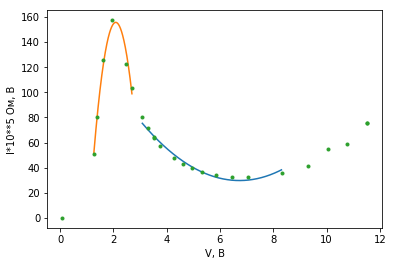

In [5]:
x1 = V1
y1 = I1

x = x1[7:20]
y = y1[7:20]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
V_min1 = -params[1]/(2*params[0])
delta_V_min1 = V_min1*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V_min = %E  +- %E' %(V_min1, delta_V_min1))
t = np.arange(x[0], x[-1], 0.01)
plt.plot(t, params[0]*t**2+params[1]*t+params[2])

x = x1[1:7]
y = y1[1:7]
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(gaussian, x, y)
# pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
V_max1 = -params[1]/(2*params[0])
delta_V_max1 = V_max1*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V_max = %E  +- %E' %(V_max1, delta_V_max1))
t = np.arange(x[0], x[-1], 0.01)
plt.plot(t, params[0]*t**2+params[1]*t+params[2])

plt.xlabel('V, B')
plt.ylabel('I*10**5 Ом, B')
plt.plot(x1, y1, '.')
plt.show()

$V_{накала}=2.33B$

a    9.203377E-01    delta a    9.469330E-02
b    -1.359639E+01    delta b    1.381481E+00
c    5.990272E+01    delta c    4.403392E+00
V_min = 7.386633E+00  +- 1.068133E+00
a    -6.785819E+01    delta a    3.027406E+01
b    2.780603E+02    delta b    1.238019E+02
c    -2.041971E+02    delta c    1.165461E+02
V_max = 2.048834E+00  +- 1.291369E+00


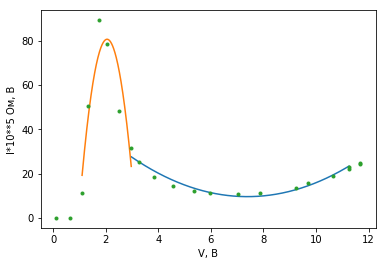

In [4]:
x1 = V2
y1 = I2

x = x1[7:20]
y = y1[7:20]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
V_min2 = -params[1]/(2*params[0])
delta_V_min2 = V_min2*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V_min = %E  +- %E' %(V_min2, delta_V_min2))
t = np.arange(x[0], x[-1], 0.01)
plt.plot(t, params[0]*t**2+params[1]*t+params[2])

x = x1[2:8]
y = y1[2:8]
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(gaussian, x, y)
# pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
V_max2 = -params[1]/(2*params[0])
delta_V_max2 = V_max2*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V_max = %E  +- %E' %(V_max2, delta_V_max2))
t = np.arange(x[0], x[-1], 0.01)
plt.plot(t, params[0]*t**2+params[1]*t+params[2])

plt.xlabel('V, B')
plt.ylabel('I*10**5 Ом, B')
plt.plot(x1, y1, '.')
plt.show()

Рассчитаем размер электронной оболочки атома $l=\frac{h\sqrt{5}}{\sqrt{32mq_e(V_{min}-V_{max})}}$

In [11]:
h = 6.6*10**-34
q = 1.6*10**-19
m = 9.1*10**-31 
l1 = h*np.sqrt(5)/(np.sqrt(32*m*q*(V_min1-V_max1)))
l2 = h*np.sqrt(5)/(np.sqrt(32*m*q*(V_min2-V_max2)))
delta_l1 = l1* (delta_V_min1+delta_V_max1)/(V_min1-V_max1)
delta_l2 = l2* (delta_V_min2+delta_V_max2)/(V_min2-V_max2)
print('l1 = %E +- %E m' %(l1, delta_l1))
print('l2 = %E +- %E m' %(l2, delta_l2))
print('l = %E +- %E m' %((l2+l1)/2, (delta_l1+delta_l2)/2))

l1 = 3.173392E-10 +- 9.784318E-11
l2 = 2.959322E-10 +- 1.308128E-10
l = 3.066357E-10 +- 1.143280E-10


Рассчитаем глубину потенциальной ямы $U_0=\frac{4}{5}E_2-\frac{9}{5}E_1=\frac{4}{5}eV_{min}-\frac{9}{5}eV_{max}$

In [16]:
U0_1 = 4/5*V_min1-9/5*V_max1
U0_2 = 4/5*V_min2-9/5*V_max2
U0 = (U0_1 + U0_2)/3
delta_U0_1 = 4/5*delta_V_min1+9/5*delta_V_max1
delta_U0_2 = 4/5*delta_V_min2+9/5*delta_V_max2
delta_U0 = (delta_U0_1 + delta_U0_2)/2
print('U0_1 = %E +- %E eV' %(U0_1, delta_U0_1))
print('U0_2 = %E +- %E eV' %(U0_2, delta_U0_2))
print('U0 = %E +- %E eV' %(U0, delta_U0))

U0_1 = 1.622820E+00 +- 1.683953E+00 eV
U0_2 = 2.221405E+00 +- 3.178970E+00 eV
U0 = 1.281408E+00 +- 2.431461E+00 eV
